# Elon Musk Tweets Analysis

### Column description

| Column | Description |
| :----: | :---------- |
| # | Index |
| id | ID of tweet |
| conversation_id | ID of twitter conversation/thread |
| created_at | Unknown, some kind of time/location index from Twitter |
| date | Date of creation |
| timezone | Timezone |
| place | Location |
| tweet | Contents of tweet, tweet body |
| language | Language of tweet |
| hashtag | Hashtags in the tweet "#" |
| cashtag | Cashtags in the tweet "$", often used for stock tweets |
| user_id | ID of the tweet/reply author |
| user_id_str | User ID but in string format |
| username | Username of the tweet/reply author |
| name | Name of tweet/reply author |
| day | Day of the week in which the tweet was published |
| hour | Hour of the day in which the tweet was published |
| link | Link to the tweet |
| urls | Urls present in the tweet |
| photos | Photos in the tweet (as links) |
| video | Videos in the tweet (Yes/No) |
| thumbnail | Thumbnail for the image present in the tweet (if applicable, otherwise null) |
| retweet | Is this a retweet? (Yes/No) |
| nlikes | Number of likes on the tweet |
| nreplies | Number of replies to the tweet |
| nretweets | Number of times the tweet was retweeted |
| quote_url | Url of quoted tweet, if applicable |
| search | Unknown |
| near | Additional location info, null |
| geo | Additional location info, null |
| source | Unknown, null |
| user_rt_id | Possibly the id of the tweet author if it's a retweet, null |
| user_rt | Possibly the username of the tweet author if it's a retweet, null |
| retweet_id | Id of the retweet, null |
| reply_to | Info about the original tweet if this datapoint is a reply |
| retweet_date | Date of retweet, null |
| translate, trans_src, trans_dest | Columns that have to do with the google translate api, which was not used, therefore these columns are all null |

### Import libraries and dataset

In [6]:
import pandas as pd
import numpy as np

In [7]:
import glob, os    
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('/Users/apple/Downloads/archive', "*.csv"))))

### Exploring dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 26
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30735 non-null  float64
 1   id               34878 non-null  int64  
 2   conversation_id  34878 non-null  int64  
 3   created_at       34878 non-null  object 
 4   date             34878 non-null  object 
 5   timezone         34878 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            34878 non-null  object 
 8   language         34878 non-null  object 
 9   hashtags         34878 non-null  object 
 10  cashtags         34878 non-null  object 
 11  user_id          34878 non-null  int64  
 12  user_id_str      30735 non-null  float64
 13  username         34878 non-null  object 
 14  name             34878 non-null  object 
 15  day              30735 non-null  float64
 16  hour             30735 non-null  float64
 17  link           

In [9]:
df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,1343644462036086785,1343320495127633920,1609184778000.0,2020-12-28 19:46:18,0,NaN,Entertainment will be critical when cars drive...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1343619610617077760,1343386617294295040,1609178853000.0,2020-12-28 18:07:33,0,NaN,@kimpaquette Just meeting with Larry Ellison t...,en,[],...,"[{'screen_name': 'kimpaquette', 'name': 'Kim P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1343608616960491521,1343576442722893825,1609176231000.0,2020-12-28 17:23:51,0,NaN,@richierichhhhh_ Absolutely,en,[],...,"[{'screen_name': 'richierichhhhh_', 'name': 'R...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1343608530998153222,1343320495127633920,1609176211000.0,2020-12-28 17:23:31,0,NaN,What should Tesla do with in-car gaming in an ...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1343431408052662273,1343043963096326147,1609133982000.0,2020-12-28 05:39:42,0,NaN,@PPathole @WSJ Absolutely,en,[],...,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum().sort_values(ascending = False)

retweet_id         34878
user_rt            34878
near               34878
geo                34878
source             34878
place              34878
trans_dest         34878
trans_src          34878
translate          34878
retweet_date       34878
user_rt_id         34878
quote_url          33837
thumbnail          32546
time               30735
mentions           30735
replies_count      30735
retweets_count     30735
likes_count        30735
nlikes              4143
search              4143
nretweets           4143
nreplies            4143
Unnamed: 0          4143
hour                4143
day                 4143
user_id_str         4143
id                     0
cashtags               0
conversation_id        0
created_at             0
date                   0
timezone               0
tweet                  0
language               0
hashtags               0
user_id                0
reply_to               0
video                  0
username               0
name                   0


In [12]:
df.drop(['timezone', 'language', 'retweet_id', 'user_rt', 'near', 'geo', 'source', 'place', 'trans_dest', 'trans_src', 'translate', 'retweet_date', 'user_rt_id', 'quote_url', 'thumbnail', 'time', 'mentions', 'replies_count', 'retweets_count', 'likes_count', 'hashtags'], axis=1, inplace=True)

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 26
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       30735 non-null  float64       
 1   id               34878 non-null  int64         
 2   conversation_id  34878 non-null  int64         
 3   created_at       34878 non-null  object        
 4   date             34878 non-null  datetime64[ns]
 5   tweet            34878 non-null  object        
 6   cashtags         34878 non-null  object        
 7   user_id          34878 non-null  int64         
 8   user_id_str      30735 non-null  float64       
 9   username         34878 non-null  object        
 10  name             34878 non-null  object        
 11  day              30735 non-null  float64       
 12  hour             30735 non-null  float64       
 13  link             34878 non-null  object        
 14  urls             34878 non-null  object  

In [15]:
print('start_date: ', df.date.min())
print('end_date: ', df.date.max())

start_date:  2010-06-04 18:31:57
end_date:  2022-03-05 00:00:00


<AxesSubplot:>

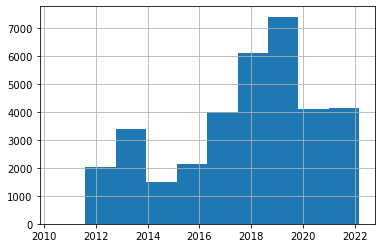

In [16]:
df.date.hist()

In [17]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [18]:
pysqldf('SELECT * FROM df LIMIT 5')

,Unnamed: 0,id,conversation_id,created_at,date,tweet,cashtags,user_id,user_id_str,username,...,link,urls,photos,video,retweet,nlikes,nreplies,nretweets,search,reply_to
0,0.0,1343644462036086785,1343320495127633920,1609184778000.0,2020-12-28 19:46:18.000000,Entertainment will be critical when cars drive...,[],44196397,44196397.0,elonmusk,...,https://twitter.com/elonmusk/status/1343644462...,[],[],0,0,55085.0,2922.0,2611.0,None,[]
1,1.0,1343619610617077760,1343386617294295040,1609178853000.0,2020-12-28 18:07:33.000000,@kimpaquette Just meeting with Larry Ellison t...,[],44196397,44196397.0,elonmusk,...,https://twitter.com/elonmusk/status/1343619610...,[],[],0,0,8631.0,601.0,314.0,None,"[{'screen_name': 'kimpaquette', 'name': 'Kim P..."
2,2.0,1343608616960491521,1343576442722893825,1609176231000.0,2020-12-28 17:23:51.000000,@richierichhhhh_ Absolutely,[],44196397,44196397.0,elonmusk,...,https://twitter.com/elonmusk/status/1343608616...,[],[],0,0,72434.0,495.0,907.0,None,"[{'screen_name': 'richierichhhhh_', 'name': 'R..."
3,3.0,1343608530998153222,1343320495127633920,1609176211000.0,2020-12-28 17:23:31.000000,What should Tesla do with in-car gaming in an ...,[],44196397,44196397.0,elonmusk,...,https://twitter.com/elonmusk/status/1343608530...,[],[],0,0,33830.0,6932.0,884.0,None,[]
4,4.0,1343431408052662273,1343043963096326147,1609133982000.0,2020-12-28 05:39:42.000000,@PPathole @WSJ Absolutely,[],44196397,44196397.0,elonmusk,...,https://twitter.com/elonmusk/status/1343431408...,[],[],0,0,2394.0,131.0,92.0,None,"[{'screen_name': 'PPathole', 'name': 'Pranay P..."


In [19]:
for tweet in df.tweet:
    if tweet[:1] == '@':
        print(tweet)

@kimpaquette Just meeting with Larry Ellison to seek some advice. Back working on Tesla end of quarter tomorrow.
@richierichhhhh_ Absolutely
@PPathole @WSJ Absolutely
@Tesmanian_com Taste of the future
@WSJ Focus on making products &amp; services people truly love, so that the total economic pie is bigger, instead of engaging in zero-sum/negative-sum corporate power struggles. This is the good future.
@ThatDesignGuy @m_siphiw @moosuraj @Tesla Roughly 95% of parts in Tesla Roadster were unique — not in any other product. Unfortunately, since we started out with the (dumb, in retrospect) goal of simply adapting Lotus Elise to electric, we ended up with a 10% too small sports car that seems kinda like a Lotus.
@LaurenRow5 @karpathy Yes
@engineers_feed Very important
@teslaownersSV @lexfridman Ok, service might be able to do this. Will check.
@teslaownersSV @lexfridman You mean install the external speaker on earlier cars that don’t have it?
@GUNMTLM3 @lexfridman No, but definitely this ye

@ArtifactsHub Haute couture
@ChrisMacFarland @Tesla Thanks!
@HandleOfRy Don’t know Ghislaine at all. She photobombed me once at a Vanity Fair party several years ago. Real question is why VF invited her in the first place 🤔
@flcnhvy Thanks Viv, you rock 💕
@InSpaceXItrust @RationalEtienne Sure, we will aim to do a cross-country drive with Cybertruck later this year
@RationalEtienne Ok fine 🤣🤣
@Khendinberg @hampgirl87 @ianbremmer @geekwire Exactly
@ID_AA_Carmack Yes
@CARandDRIVER Thank goodness! Front license plates make my eyes bleed.
@SamTalksTesla Not bad
@GerberKawasaki But sooo satisfying
@karee70091349 Should have a free trade agreement with US. No tariffs at all either way.
@RationalEtienne I worried we won’t be taken seriously if our short shorts have flames 🤣🤣
@Leroyspankin He wore them well. No denying it.
@Partyp74 Busted! I secretly ♥️ short shorts.
@terribletrader_ Great interview 🤣🤣
@907XCP @WSBConsensus Yes
@WSBConsensus Sellers of medium height or above are fine
@mantovan

@TeslaGong @archillect I did
@cleantechnica Teslas in a tunnel. Happening in Vegas rn.
@archillect obv
@nichegamer BGII was amazing
@PPathole @Erdayastronaut @Teslarati Yes, will also show real-time changes to max acceleration, braking, cornering, speed on gradient &amp; range, latter factoring in route elevation changes &amp; cargo or tow mass &amp; drag impact
@Erdayastronaut @Teslarati It’s slightly better
@nichegamer Definitely worth trying imo
@Teslarati Btw, in some prior tweets I’d said production Cybertruck would be ~80” wide (vs ~84” body width at unveil). This is slightly too small. Will be closer to 82”, but come standard with upper laser blade lights.
@Teslarati Active ride height &amp; active damping are game-changing for a truck or any car with a high max/min weight ratio
@flcnhvy @SciGuySpace F9 iteration slowed down as payloads became too important to risk. Little change is expected going forward with F9/FH or Dragon. Starship production &amp; thus iterative improvement

@SpacePadreIsle @SciGuySpace @faa Good conversation with head of FAA Space. Need a bit more hazard analysis &amp; should be clear to fly soon.
@SpacePadreIsle @SciGuySpace Am talking to @FAA in a few hours
@flying_briann @SciGuySpace Stacking fairing &amp; tanks soon, then adding control fins, engines &amp; landing gear
@ThePhoenixFlare @CazzRS That was my actual password at one point!
@CazzRS Stop posting my password on twitter!
@Inelonwetrust__ @dbabrams @BangOlufsen Coming
@dbabrams @BangOlufsen Tesla audio engineers come from B&amp;O &amp; many other companies. They literally rōq. Our system is highly programmable, so we keep improving it via OTA codec updates.
@chadsmith @Tesla We’ll take care of it
@JaneidyEve @SpaceX Not yet
@justpaulinelol 🤣
@acf3301 True
@C3LT_Games Roughly
@Kristennetten @tesla_truth Ok
@tesla_truth Possibly two weeks
@danielinhodu83 Working on upgrades to Sentry …
@GrizzlyAustin @Tesla No plans to introduce air suspension on Model 3 at this time
@HarryStoltz

@John_Gardi @SpaceX But not an extendable nozzle though, as that just saves length. Nozzle diameter is limited by body diameter.
@SpaceXFan97 @alexmd2 @SpaceX Much above 300 bar main chamber pressure means extreme oxygen preburner pressure of 700 to 800+ bar. Definitely pushing the limit of known physics.
@_cgp @SpaceX Propellant was not deep cryo. CH4 &amp; O2 were just barely below liquid temp at 1 bar. In theory, Raptor should do ~300 bar at deep cryo, provided everything holds together, which is far from certain. However, only 250 bar is needed for nominal operation of Starship/Super Heavy.
@John_Gardi @SpaceX Yes, aiming for 380 sec Isp with vac nozzle. Maybe 382 if we get lucky.
@13ericralph31 @SpaceX I think 6 where we lit main chamber &amp; several with only preburners
@johnkrausphotos @SpaceX About 11 secs
@alexmd2 @SpaceX Definitely! It’s amazing that the RD-170 &amp; RD-180 engines held the record for so many decades. Excellent engineering.
@rocketisfine @leo190102 I was sim

@Grady_Booch @slashdot C
@ayshardzn Given Chiang Rai airport hours, soonest we could’ve departed US was an hour ago, but cave now closed for diver rescue. Will continue testing in LA in case needed later or for somewhere else in future.
@DowdEdward Will do. Even if not useful here, perhaps it will be in a future situation.
@slashdot Yes
@dirkbonhomme @JelteDesign @maysacha Yes
@JelteDesign @maysacha Fitted for a kid or small adult to minimize open air. Segmented compartments to place rocks or dive weights &amp; adjust bouyancy.
@abroadwithalec @maysacha Yes
@maysacha 4 handles/hitch points on front &amp; 4 on rear. 2 air tank connections on front &amp; 2 on rear, allowing 1 to 4 tanks simultaneously connected, all recessed for impact protection w secondary cap seal if leak develops.
@thanr @ablack82 I’m in LA working with the SpaceX team building the kid mini-sub
@aiyanaskye Construction complete in about 8 hours, then 17 hour flight to Thailand
@VoltzCoreAudio Ground winds would
@Volt

@LoganJastremski I'm auditioning to be a roofing spokesmodel  in the greater Reno area
@RickandMorty The singularity for this level of the simulation is coming soon. I wonder what the levels above us look like.   Good chance they are less interesting and deeper levels are better. So far, even our primitive sims are often more entertaining than reality itself.
@stapf The Tesla team has done this for many smaller islands around the world, but there is no scalability limit, so it can be done for Puerto Rico too. Such a decision would be in the hands of the PR govt, PUC, any commercial stakeholders and, most importantly, the people of PR.
@RickandMorty Final episode was disgustingly good
@YasserHZain @verge It would need to refill to return, but it could get to Jupiter with low payload
@YasserHZain @verge Homes on Jupiter with solar-power *and* a Powerwall going right now for great price!
@MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a 

@scottwww @realrobcopeland Yeah, I didn’t have a house in the Bay Area for over a decade, despite spending half the week there
@nurodev Disney restricted us to US only
@JeffTutorials Yes, but if we find unexpected bugs, release might be delayed until 24th
@WillFealey Yes
@WholeMarsBlog We’re aiming for a significant improvement for owners outside the US around March, depending on regulatory approvals
@Gfilche It’s a great whistle!
@Tesmanian_com When the 10b preprogrammed sales complete. There are still a few tranches left, but almost done.
@BillyM2k @daelmor @DanCrenshawTX 💯
@WholeMarsBlog This assumes completion of the 10b sales
@cleantechnica Pure vision, especially when using explicit photon count, is much better than radar+vision, as the latter has too much ambiguity – when radar &amp; vision disagree, it is not clear which one to believe
@nichegamer 🤣
@teslatidbits @WholeMarsBlog @DanCrenshawTX A strong bias towards consumption tax makes sense
@daelmor @BillyM2k @DanCrenshawTX 🤣 

@BLKMDL3 @TeslaCharging Major Supercharger openings in west LA coming soon!
@SPEXcast @TrungTPhan Starship will be crushingly cost-effective for Earth orbit or moon missions as soon as it’s operational &amp; rapid reuse is happening.   Mars is a lot harder, because Earth &amp; Mars only align every 26 months, so ship reuse is limited to ~dozen times over 25 to 30 year life of ship.
@SamoNaro @TrungTPhan All models do make use of aluminum casting, but new Y will be most advanced with 2/3 of body cast.
@rahul555gandhi @SciGuySpace Sorry, it’s been pretty intense lately
@CommiNathan @SciGuySpace Same
@SciGuySpace I have great respect for Kathy Lueders
@TrungTPhan Actual volume manufacturing, where cash in &gt; cash out, is so damn hard most people have no idea
@thesheetztweetz The sad thing is that even if Santa Claus suddenly made their hardware real for free, the first thing you’d want to do is cancel it
@WElRDPHYSICS Super agree!
@OwenSparks_ @spacex360 Seriously
@ID_AA_Carmack In the 

@Teslarati @KlenderJoey Their negative gross margin will be staggering
@ICannot_Enough @Model3Owners Coming soon, if you want your car to make a loud farting sound from the external speaker, just say “Fart in their general direction!”
@GerberKawasaki @ICannot_Enough @Model3Owners All cars made since November also have push center for horn – just waiting on firmware update. If you mash right side of yoke with your palm, horn will trigger.
@Liv_Boeree If your war technology level is far higher than your opponent, tactics don’t matter: source_not_found
@ICannot_Enough @Model3Owners Swipe down on navigate button to navigate home or to work if at home
@DriveTeslaca Depends on what issues we see that are unique to Canada. If things are looking good, then we can lower the safety score threshold.
@FedorovMykhailo You are most welcome
@FedorovMykhailo Starlink service is now active in Ukraine. More terminals en route.
@Space_Pete Good thread
@tes1m211 @Rogozin Yes
@Rogozin  https://t.co/4kRJyp0

@RobGMacfarlane @nybooks @emilyraboteau Same goes for digital super intelligence denial
@zerohedge 😘  https://t.co/w0BkNGbvQ1
@stephenjudkins @flcnhvy Yes
@bluemoondance74 @flcnhvy Deleting throttle allows the engine to achieve max thrust on max thrust variant. Other variants will have throttle.
@bluemoondance74 @flcnhvy SpaceX engine production is gearing up to build about a Raptor a day by next year, so up to 365 engines per year. Most will be the (as high as) 300 ton thrust (but no throttle &amp; no gimbal) variant for Super Heavy. Cumulative thrust/year could thus be as high as 100,000 tons/year.
@bluemoondance74 @flcnhvy Raptor is evolving rapidly. Probably wouldn’t consider it to be even V1.0 until roughly engine 50, although probably engines 12+ can be retrofitted for orbital flight, especially on Super Heavy, which is less sensitive to engine variation. It just needs crazy up force!
@jchybow @teslaownersSV @flcnhvy Pretty much
@leo_cadle @teslaownersSV @flcnhvy Exactly! It’s al

@BazBarnum @MartinWoolleyUK @ElecVehicleGuy Feedback received. Restoring white interior.
@MartinWoolleyUK @ElecVehicleGuy That’s the idea
@ShannonZKiller @nbcsnl @Tesla 🤣
@wintonARK Thoughtful model
@BdgBill @teslaownersSV @Tesla Based on our data, Autopilot miles appear to be twice as safe as manually driven miles, and we expect this to improve further
@AnthonyFinno @RobertOHaver @Tesla Tesla is affecting powerful vested interests. Big auto &amp; oil companies aren’t known for their gentle behavior. SpaceX is battling US military prime contractors &amp; space programs of national govts. No walk in the park there.
@13ericralph31 @PPathole @Erdayastronaut @rmarcilhoo @kimitalvitie @SpaceXNow @ChrisG_NSF @NASASpaceflight Yeah, *way* better. Dramatically improves cost, complexity &amp; ease of operations. Distances of ~10,000 km with decent payload seem achievable at roughly Mach 20.
@PPathole @Erdayastronaut @rmarcilhoo @kimitalvitie @SpaceXNow @ChrisG_NSF @NASASpaceflight Add 2 to 4 mor

@officialjaden Yes. Will require tapping indicator to confirm at first. When safety looks good after 10M miles of driving or so, there will be an option to turn off confirm.
@pjj_knowles @yames51 @DigitalDunzey No, but I will
@mangeHDbackup Isn’t it obvious?
@yames51 @DigitalDunzey Worth it
@vincent13031925 @cleantechnica @CNBC @businessinsider @business @WSJ @Teslarati @InsideEVs True
@sheldonth @FactsDataTruth @Tesla Not exactly. We just bundled the upgrade package into Performance. No problem if you want to return the car, but I think lifetime free Supercharging is a good deal.
@fb1975 @DigitalDunzey Haha
@DigitalDunzey On Insta, 10% of followers like even lame posts. On Twitter, good posts get 1%.
@_Akhaten @nichegamer @raissabontempo @SomeGrayAreas @reddit @Twitter Lacks scale
@nichegamer @raissabontempo @SomeGrayAreas @reddit @Twitter Reddit is massive, but def has gems
@SomeGrayAreas @reddit @Twitter Reddit’s twitter account is lame, because it’s not real Reddit
@Mcgillligan Exa

@evepeyser @broderick This is going to help journalism, not harm it. Please be so kind as to hold your fire until you actually see it.
@kot_kotushkin I know, I know. Russia seriously didn’t correct me on this!
@broderick Something needs to be done to reward consistent, high quality journalism. Some in media are absurdly indignant before even seeing the product. Odd …
@designcollector For some reason, Russia didn’t bother to correct me …
@DavisTravis9830 @amywestervelt @Billsocalif @RMac18 @weinbergersa Definitely did not. I’ve been through many press cycles &amp; know full well same person praising me today will trash me tomorrow. Journos hound me constantly for interviews, but I do almost none these days. ♥️ Twitter as it allows me to bypass journo bs.
@amywestervelt @Billsocalif @RMac18 @weinbergersa I’ve just had it with sanctimonious journalists who appoint themselves protectors of the public interest &amp; yet believe that same public is too stupid &amp; immoral to assess their cr

@TimDehoucke Coming later today
@JaneidyEve @arstechnica @TeslaMotors @SpaceX Suggestions welcome!
@tehwrx @martinengwicht @ThePhoenixFlare I think Einstein said that
@tehwrx @martinengwicht @ThePhoenixFlare Or does the Earth move up?
@ThePhoenixFlare This is a really great floor
@satalino15 Nothing to be done, but wait. It's all right here:  https://t.co/BIcT4avkJ1
@DouglasABailey News on Sunday
@Trucker_Ty_ @SavvyTroll @GeorgeTakei Maybe it is time for the man cape to return
@ixmeteorite @newscientist Didn't read it. Might now though.
@newscientist Exactly
@MxPR Me too
@SimplyDonya Yes, but arguably that's worse
@itsBorked A floor that moves
@SyrenBoaz A ceiling is simply a floor from below
@SandyMazza Gary (the snail) is a speed demon. Long way to go before we beat him/her.
@TEDTalks Thanks, but I am
@Viss Several tons of force on each fin at high angles of attack &amp; peak heating is the cube of speed, so a Mach 8 reentry is 8X Mach 4. Intense.
@migueldelagza They should on high v

@awadsayeed Yes. Technically Model 3 or maybe three horizontal bars. Won't be three vertical bars.
@BillGates @RyanSeacrest @TEDchris Am a bit under the weather, but will do it!
@drwave @itsDanielSuarez Yeah, Daemon is a great read
@IrrelevantGamer @masseffect Mass Effect 2 is one of the best games ever. Also love Saints Row IV.
@leroytwin @Tesla_Canada A lot of Canadian Superchargers are in work and will start going live in the next month or so
@Ash_Dale I do seriously need a haircut :)
@QuantumG When we launch I want to know that SpaceX has done everything possible to keep the astronauts safe. Only a few more years to go.
@QuantumG Dragon V1.1 doesn't have a launch escape system. Probably comparable reliability to Shuttle, but we need to do better.
@RichardGarriott Just the air in Dragon. Technically, if a few humans had stowed aboard Dragon on the last flight, they would've been ok.
@westcoastbill First, the cheese. Then, the mouse.
@Oatmeal may all technology in the future follow t

@DMC_Ryan Should be very soon. We’ve already made around 100 Model 3 Performance cars for test drives in stores.
@bevvscott @eehouls Exactly
@eehouls No, it means I created jobs for 50,000 people directly and, through parts suppliers &amp; supporting professions, ~250,000 people indirectly, thus supporting half a million families. What have you done?
@HelloCullen Already have
@blake_kistler @BBCWorld Ironically, the “billionaire” label, when used by media, is almost always meant to devalue &amp; denigrate the subject. I wasn’t called that until my companies got to a certain size, but reality is that I still do the same science &amp; engineering as before. Just the scale has changed.
@LanceUlanoff @BBCWorld Good for rescuing vulnerable patients in dangerous environments, particularly if water, toxic gas or dangerous bacteria/viruses present, as patient would remain dry &amp; at std air pressure entire time.
@Sarthk007 @BBCWorld Yes, it was specifically designed to pass that point
@BBCWo

@elonmusk ... In honor of IMB, RIP.
@trakz @TheSimpsons Of course!
@ID_AA_Carmack Full RUD (rapid unscheduled disassembly) event. Ship is fine minor repairs. Exciting day!  http://t.co/tIEctHFKHG
@ID_AA_Carmack Residual fuel and oxygen combine  http://t.co/5k07SP8M9n
@ID_AA_Carmack Rocket hits hard at ~45 deg angle, smashing legs and engine section  http://t.co/PnzHHluJfG
@ID_AA_Carmack Before impact, fins lose power and go hardover. Engines fights to restore, but …  http://t.co/94VDi7IEHS
@ID_AA_Carmack Tks. Turns out we recovered some impact video frames from drone ship. It's kinda begging to be released…
@FormulaSAE Contact Steve Davis at Hyperloop@spacex.com
@alankerlin Hydraulics are usually closed, but that adds mass vs short acting open systems. F9 fins only work for 4 mins. We were ~10% off.
@ID_AA_Carmack That works for Dragon, but hard to do for something long like Falcon
@ID_AA_Carmack No choice. Entry velocity too high for a precision landing with N2 thrusters alone. Must h

@KAlHomoud Superchargers in Canada will go live in 6 to 8 weeks. Update on forums shortly.
@MarinaSBlinova Rocket boost stage reaching 0 m/s in one piece :) Will know soon. Odds not high.
@erwinEmm Need to make sure precision return from hypersonic velocity works in ocean before transitioning to land
@elonmusk Also, breakfast at Tesla is self-serve cereal (no distinction for execs) and the person mentioned isn't actually an employee
@AKAbrahamson @itsDanielSuarez Yeah, that's worth a read
@MarinaSBlinova @MikeJudge @Recode That would definitely help
@justincooperman @MikeJudge @Recode Yeah, that about sums it up
@BKuppersmith Coming soon
@OlejAndersen Once 5.9 is rolled out to the whole fleet and all looks good, we will roll out 6.0 to owners on our public beta program
@OlejAndersen Some challenges w 5.9 rollout, as it contains software specially written for car owners in Norway &amp; Belgium
@cairnz 80% to 30%
@FlateFred agreed
@jnags92 Yes, I'm confident that Tesla will do something 

@ScottLucasNV Definitely
@ScottLucasNV Lithium deal is not exclusive &amp; has many contingencies. The press on this matter is unwarranted.
@elonmusk $35k price, unveil in March, preorders start then.
@Forbes I appreciate the kind words in the article, but, judging by the picture mods, it looks your Photoshop bill was very high.
@BjornNyland Provided all ten take delivery, you have indeed!
@CatherineMotuz yes
@tallakt Various forms of shades are being considered. May not be necessary though.
@alipoursamar all regions
@Alyssa_Milano Thanks Alyssa!
@loic thanks Loic :)
@ID_AA_Carmack Even if inevitable, we should at least attempt to postpone the advent of AI weaponry. Sooner isn't better.
@kevinmitnick probably end of year
@DavidBrin Thanks David
@adventFuturist yeah, not the best birthday
@juanmlemao Thanks :)
@NoMansSky You're welcome. Good conversation.
@connollyjeff1 @TheStreet End of year
@kpe @SpaceX @grierallen @natedapore Cool, thanks for letting us know. This is helpful for figu

In [20]:
def word_count(str):
    counts = dict()
    word = str.split()
    
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

def tweet_counts(tweet_array, threshold = 10):
    unique, counts = np.unique(np.array(tweet_array), return_counts = True)
    count_dict = dict(zip(unique, counts))
    
    return [(k, v) for k, v in count_dict.items() if v > threshold]

In [23]:
who = []
for tweet in df.tweet:
    if tweet[:1] == '@':
        parts = tweet.split()
        for i in range(0, len(parts)):
            if parts[i][0] == '@':
                who.append(parts[i])

In [26]:
tweet_counts(who, 100)

[('@13ericralph31', 113),
 ('@28delayslater', 127),
 ('@DJSnM', 120),
 ('@DMC_Ryan', 197),
 ('@Erdayastronaut', 1027),
 ('@EvaFoxU', 158),
 ('@FredericLambert', 312),
 ('@ID_AA_Carmack', 136),
 ('@JaneidyEve', 145),
 ('@John_Gardi', 105),
 ('@Kristennetten', 225),
 ('@MKBHD', 113),
 ('@MacTechGenius', 111),
 ('@Model3Owners', 165),
 ('@NASA', 182),
 ('@NASASpaceflight', 240),
 ('@PPathole', 410),
 ('@RationalEtienne', 171),
 ('@Robotbeat', 114),
 ('@SciGuySpace', 181),
 ('@SpaceX', 922),
 ('@Tesla', 1459),
 ('@TeslaMotors', 176),
 ('@Teslarati', 420),
 ('@WholeMarsBlog', 341),
 ('@WorldAndScience', 126),
 ('@annerajb', 221),
 ('@bluemoondance74', 103),
 ('@boringcompany', 112),
 ('@cleantechnica', 248),
 ('@engineers_feed', 119),
 ('@flcnhvy', 645),
 ('@justpaulinelol', 123),
 ('@lexfridman', 114),
 ('@martinengwicht', 110),
 ('@mayemusk', 107),
 ('@nextspaceflight', 107),
 ('@nichegamer', 158),
 ('@teslaownersSV', 465),
 ('@thesheetztweetz', 104),
 ('@thirdrowtesla', 126),
 ('@vicente

In [30]:
replies_df = pd.DataFrame(tweet_counts(who, 100), columns = ['who', 'count']).sort_values('count', ascending = False)
replies_df

,who,count
21,@Tesla,1459
4,@Erdayastronaut,1027
20,@SpaceX,922
31,@flcnhvy,645
38,@teslaownersSV,465
23,@Teslarati,420
16,@PPathole,410
24,@WholeMarsBlog,341
6,@FredericLambert,312
29,@cleantechnica,248


In [31]:
for tweet in df.tweet:
    if tweet[:1] != '@':
        print(tweet)

Entertainment will be critical when cars drive themselves
What should Tesla do with in-car gaming in an autonomous world?
Try playing Polytopia in your Tesla! Great game. Multiplayer online version coming soon.
Change your horn sound to 🐐, 🐍🎷, 💨 or holiday jingles with latest Tesla software update!
Merry Christmas &amp; happy holidays! 🎁  https://t.co/uk6NSPwR9R
12 story rocket turns off its engines &amp; does a controlled fall
To Tesla owners taking delivery in the final days of year, your support is super appreciated!!
Thanks to everyone who worked so hard to make Tesla successful. My heart goes out to you.
♥️ i love all u crazy ppl out there ♥️
Come for the comments,  stay for the memes💄
One word: Doge
Bitcoin is almost as bs as fiat money
 https://t.co/EbOjGshvrq
“Lord” Edge
Just kidding, who needs a safe word anyway!?
Bitcoin is my safe word
Star Light, Star Bright  https://t.co/6CeTAZSXCO
Ascent to the Heavens  https://t.co/oGgsw88YRZ
Hehe  https://t.co/SkLMiL3OxT
 https://t.co/s

♥️ Tesla Owners ♥️
Mars Base Alpha  https://t.co/O1llQp8rFY
 https://t.co/Fn0hKJd3uJ
Tesla piece on the physics of car safety coming soon for those interested in technical details
.@NHTSAgov will post final safety probability stats soon. Model 3 has a shot at being safest car ever tested.
♥️ @neiltyson
True 😀  https://t.co/CS6semhKm6
Moon mission will be livestreamed in high def VR, so it’ll feel like you’re there in real-time minus a few seconds for speed of light
 https://t.co/nqgfNWlm4Z
Hanging out with @yousuck2020 before the @SpaceX moon mission announcement  https://t.co/RTOwutzMtG
Yusaku will be bringing 8 (brave) artists &amp; cultural figures with him on the journey around the moon!
Thank you for your trust in the @SpaceX team. Greatly appreciated.
Due to some Tesla owners encountering system issues yesterday, the free Supercharging referral program will be extended until tomorrow night
Top SpaceX priority is and will remain supporting @NASA crewed spaceflight and National Sec

Model 3 orders, whether in store or online, are limited to two per person
Online ordering at  https://t.co/46TXqRrsdr will now open at 7:30pm Pacific to ensure no server overload. Presentation still at 8:30.
Incredibly inspired by the interest in Model 3. You won't be disappointed. Also, small token of appreciation coming for those who lined up.
Model 3 unveil will be webcast live at 8:30pm California time at  https://t.co/46TXqRrsdr
Tomorrow is Part 1 of the Model 3 unveil. Part 2, which takes things to another level, will be closer to production.
Model 3 order day starting in Australia  https://t.co/T6aUnG5BCv
You can now buy cruise ship tickets for the Arctic passage. Seeing is believing.  https://t.co/LhKupkNMFC
Great article by @BadAstronomer. Important to note max temp record. Too much attention on avg temp. Max matters most  https://t.co/0FnIAVsbIu
Looks like we may need to increase production plans for the Model 3  https://t.co/fmCPFC9FEm
Tesla charger map  https://t.co/9tei7lU

To be clear, CtG absolutely did *not* bang her horse. They were just close friends who liked to take showers together and spoon at night.
Right mood, scented candles, Barry White singing "Can't Get Enough of Your Love, Baby" and the magic (by that I mean horsef*ing) happens ...
I'm just saying that u shouldn't pass judgment based on one night of passion. Sometimes things just happen and u go with the moment :)
Sew one button, doesn't make u a tailor; cook one meal, doesn't make u a chef; but f* one horse and u r a horsef*er for all of history...
Am reading Robert Massie's book on Catherine the Great. Yeah, I know what you're probably thinking ... did she really f* a horse?
Am not saying that is *necessarily* good or bad, but reality will force us to live with the consequences of our actions  http://t.co/fnXmhUok
Interesting Economist article about how humanity's collective actions have created a fundamentally new geological age -- the Anthropocene.
If you ever wanted to know the *real*

Meant to say annualized production rate at end of 2019 probably around 500k, ie 10k cars/week. Deliveries for year still estimated to be about 400k.
Tesla made 0 cars in 2011, but will make around 500k in 2019
4000 Tesla cars loading in SF for Europe  https://t.co/BODbSzo3Fr
Did meme review last night with Justin Roiland from @RickandMorty
 https://t.co/OA5Q8NnsNR
SpaceX foundry casting Raptor engine manifold out of Inconel  https://t.co/zWlqNwGj0R
 https://t.co/JufeavpKj6
Of course I still love you  https://t.co/XNoLRKYnlc
CNBC - “Tesla Model 3 ranked most satisfying car”  https://t.co/shrTodu5dt
Tesla Model X first SUV to receive a perfect crash test rating  https://t.co/51dt8bYvzD via @businessinsider
Bet the other carmakers didn’t see that one coming haha
To air is human
Raptor reached 268.9 bar today, exceeding prior record held by the awesome Russian RD-180. Great work by @SpaceX engine/test team!  https://t.co/yPrvO0JhyY
Just left Zeebrugge, now Tilburg, then Tesla HQ in Amsterd

Tesla product unveiling on the 17th (unexpected by most), followed by Tesla/SolarCity on the 28th
US automotive deaths rose 10% to 17,775 in first half of 2016, approx 1 every 88 million miles  https://t.co/8vrAHA80yB
Cumulative Tesla Autopilot miles now at 222 million
Sabotage of the rocket is unlikely, but this article has some great theories :)  https://t.co/1fCRbZvRHo
Wow, this tweet is like a Rorschach test
No irony or uhh "shade" meant here. T's character is excellent and well-played. Worth seeing.
Some of the future episodes of Westworld feature my ex. Talulah does a great job of playing a deadly sexbot :)
More Kerbal!  https://t.co/IDeV1wAfVR
A Million Humans Could Live on Mars By the 2060s  https://t.co/d0nlk1xfOl via @NatGeo
Good article on the interplanetary transport system on Gizmodo  https://t.co/nysjRDQWFz
Waiting for everyone to reach their seats and get settled. Starting in 5 to 10.
12m rocket booster diameter, 17m spaceship diameter, 122 m stack height
Full Interplane

Heard an interesting comment at the debate: "If we see no angels in others, we harbor none in ourselves."
Am in Yellowstone at an Oxford style debate about women and society. I'm in favor :)
"Welcome qwerty monkey Jesus love" are the top 5 most popular passwords after "password".   http://t.co/P2a9Cfcd
Will publish something on the Hyperloop in about four weeks. Will forgo patents on the idea and just open source it. Not a vac tunnel btw.
"Most of us live in a semi-somnambulistic state &amp; the days fly by. The 2 exceptions are childhood and when we are in love." - RG
Headed to a (ahem) volcano caldera. Since I didn't finish my PhD, it's actually "Mr." Evil.  http://t.co/e2cpsgEM
Going at full speed! MT “@iansomerhalder: Elon- you are my hero my friend.Please!Ramp up production on cars that use NO gas."
Now back to work. Intense months ahead as we ramp production of rockets and cars.
Moonbow's are real, btw. I'm not on acid :) Here is what we saw:  http://t.co/ux6fV6z7
Am standing on 

Tesla Model S driven 285 miles from Vegas to the beach in LA on a single charge by @motortrend  http://t.co/8YvO1tsz
This piece about Mars in the NYT is worth a read  http://t.co/mNB6f1aS
For their test drive, the Motor Trend team drove from LA to San Diego and back without recharging  http://t.co/5mH0xBGr
Motor Trend tests Model S as fastest American sedan at 3.9 sec 0-60 mph and tied for 1st worldwide in stopping distance
Neil Armstrong was a hero to all of humanity. His spirit will carry us to the stars.
I love the sight of Teslas in the morning. Production line review is looking good!  http://t.co/damib6tk
Glad to contribute to the Tesla museum and will do more in the future. He was a great man.  http://t.co/NR2QNiax
About to go through my first jury selection process. Trial concerns an alleged gang related murder. Hardcore.
Deeply appreciate @NASA's faith in @SpaceX. We will do whatever it takes to make NASA and the American people proud.
1st pure solar gigawatt hour day just achi

Still working on the Falcon fireball investigation. Turning out to be the most difficult and complex failure we have ever had in 14 years.
Finishing Autopilot blog postponed to  end of weekend
Loss of Falcon vehicle today during propellant fill operation. Originated around upper stage oxygen tank. Cause still unknown. More soon.
We need to do one more minor rev on 8.0 and then will go to wide release in a few weeks
Writing post now with details. Will publish on Tesla website later today.
Major improvements to Autopilot coming with V8.0 and 8.1 software (std OTA update) primarily through advanced processing of radar signals
Thanks for the longstanding faith in SpaceX. We very much look forward to doing this milestone flight with you.  https://t.co/U2UFez0OhY
Journalist Q&amp;A for 30 mins and embargo ends at 12:30
Tesla product announcement at noon California time today
Owner account of a Model X severely  impacted by a Yukon  https://t.co/qbVdhbXBU1
Correlation is not causality or ... 

Huge appreciation for @NASA, without whom we could not even have started, let alone reached this far.
Falcon flew perfectly!! Dragon in orbit, comm locked and solar arrays active!! Feels like a giant weight just came off my back :)
T minus 60 seconds. Terminal autosequence initiated. #DragonLaunch
T minus 10 minutes ... Entering terminal count #dragonlaunch
Major Tesla milestone: All crash testing is complete for 5* (max) safety rating. Cars can now be built for sale to public!
Just did an interview with Spaceflight Now. Some of your questions may be answered here:  http://t.co/vF0Rs3p1
Simulations show launch ok with bad valve. Still, better to stop &amp; fix. Recalling rockets after launch is not an option.
Launch aborted: slightly high combustion chamber pressure on engine 5. Will adjust limits for countdown in a few days.
Whatever happens today, we could not have done it without @NASA, but errors are ours alone and me most of all.
Must remember not to refer to Chimpanzees as deadly

SpaceX Photos Are Now Available Under a Creative Commons License  http://t.co/OgHJYimuCU
Thanks to everyone that supported Tesla in New Jersey! We couldn't have done it without you.  http://t.co/swlApOg7vN
However, when self-driving cars become safer than human-driven cars, the public may outlaw the latter. Hopefully not.
To be clear, Tesla is strongly in favor of people being allowed to drive their cars and always will be. Hopefully, that is obvious.
Battery pack swap is active between SF and LA and seems to be working well. Supercharging is the future, though, for non-commercial traffic.
Neither I nor the company are selling shares. Even if we were, I wouldn't do this. It would be wrong. Our long term results are what matter.
Some people seem to think I tweet to affect share price. This is false. A brief rise in $TSLA stock obviously does no good for Tesla or me.
SolarCity systems generated a new daily record of 4 gigawatt-hours this week  http://t.co/7MFig1lMsF
World's largest hedge

Will show Johnny Cash hover slam rocket video for the first time in about 15 mins. Test footage only 36 hrs old. #SXSW
Check out Model S at Tesla Austin Gallery at The Domain opening today! I will stop by this eve and tomorrow morning.
Random trivia: my grandfather &amp; great grandfather were both born in Minnesota. I was named after my GGF.
Minnesota auto dealers tried to pass legislation to block Tesla stores. Bill was just defeated in Senate. Thanks MN!
Arrived Austin. Talking with TX House about creating an orbital launch complex near Brownsville, then #SXSW keynote tmrw
Saw a play about Stalin in Norwegian. Like watching mimes with emoticons doing Solzhenitsyn.  http://t.co/YsWV6IF3QL
Am in Oslo to thank the Norwegian customers of @TeslaMotors personally. Highest Model S orders per capita in the world.
Just received #Dragon docking clearance from @NASA. Will begin orbital maneuvers to Space Station at 11pm Pacific time.
Would also like to thank @USAirForce for allowing us to use 

In [34]:
len(df[df['retweet']=='1'])

0